In [1]:
import diplib as dip
import matplotlib.pylab as plt
import numpy as np

plt.rcParams['figure.dpi'] = 72

DIPlib -- a quantitative image analysis library
Version 3.5.1 (Jul  5 2024)
For more information see https://diplib.org


一个图像可以有任意数量的值与每个像素相关联。每个像素只有一个值的图像是标量图像。多个值可以在一个或两个维度上排列，作为矢量图像或矩阵图像。彩色图像是矢量图像的一个例子，例如在RGB色彩空间中，每个像素的矢量有3个值，它是一个3D矢量。向量和矩阵的泛化是一个张量。一个0阶张量是一个标量，一个1阶张量是一个向量，一个2阶张量是一个矩阵。

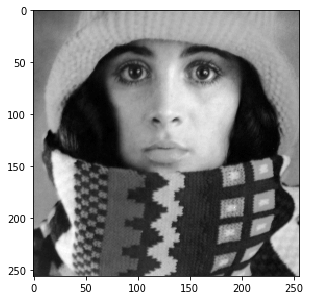

In [2]:
img = dip.ImageRead('E:\\JKZ_programs\\shanneng\\diplib-notebooks\\trui.ics')
img.Show()

### 计算梯度

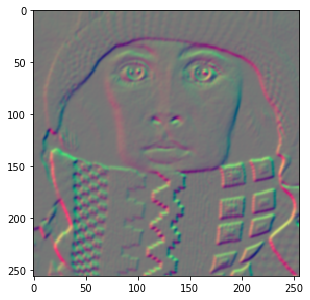

In [3]:
g = dip.Gradient(img)
g.Show()

In [4]:
print(g.TensorElements())
print(g.TensorShape())

2
column vector


<Tensor image (2x2 symmetric matrix, 3 elements), SFLOAT, sizes {256, 256}>


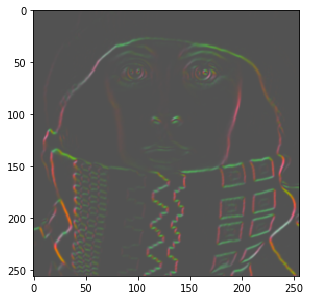

In [9]:
S = g @ dip.Transpose(g)    # 计算张量积 @是张量积运算符
print(S.__repr__())
import numpy as np
S_numpy = np.asarray(S)
S.Show()

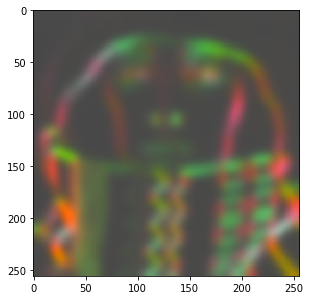

In [10]:
dip.Gauss(S, out=S, sigmas=5)
S.Show()

In [11]:
eigenvalues, eigenvectors = dip.EigenDecomposition(S)   # 计算特征值和特征向量
print(eigenvalues.TensorShape())
print(eigenvectors.TensorShape())

diagonal matrix
column-major matrix


特征分解是这样的：S @特征向量==特征向量@特征值。特征向量是一个完整的2x2矩阵，因此有4个张量元素。它们按列主顺序存储。第一列是对应于第一个特征值的特征向量。特征值按降序排序，因此第一个特征向量垂直于图像中的边缘。

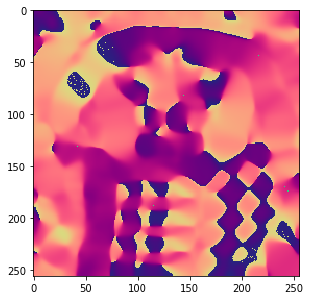

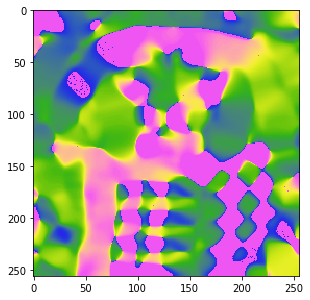

In [13]:
v1 = eigenvectors.TensorColumn(0)
v1.Show()
angle = dip.Angle(v1)   # 计算角度
angle.Show('orientation')

从张量中提取列会产生一个矢量图像，这会导致共享数据。转置矩阵只会改变矩阵的存储顺序，而不需要复制或重新排列数据

In [14]:
tmp = dip.Transpose(eigenvectors)
print(tmp.TensorShape())
print(tmp.SharesData(eigenvectors))

row-major matrix
True


<Tensor image (2x2 symmetric matrix, 3 elements), SFLOAT, sizes {256, 256}>


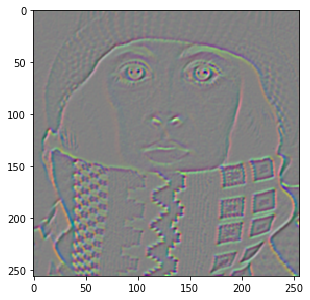

In [15]:
# Hessian矩阵
H = dip.Hessian(img)
print(H.__repr__())
H.Show()

剩下的矩阵操作我没看